## Project 2 
### Team Member: Dengyi Liu, Xin Xiang, Yuchen Wang

#### Import necessary libraries

In [52]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import json

## Part I

#### Store book information include name, author, etc,. as HTML file, then upload to gitHub.

In [53]:
data = []
book_url = 'https://raw.githubusercontent.com/DengyiLiu/DAV_Project2/main/booksinfo.html'
response = requests.get(book_url)
html = response.text
soup = BeautifulSoup(html)
for div in soup.select('li.book'):
    name = div.select_one('h2.name').get_text()
    #authors = [ele.get_text() for ele in div.select('div.authors span')]
    authors = div.select_one('div.authors span').get_text()
    #publisher = [ele.get_text() for ele in div.select('div.publisher')]
    publisher = div.select_one('div.publisher').get_text()
    publish_date = div.select_one('div.publish_date').get_text()
    data.append([name, authors, publisher, publish_date])
html_df = pd.DataFrame(data=data, columns=['name', 'authors', 'publisher', 'publish_date'])
html_df

,name,authors,publisher,publish_date
0,The Three Body Problem,"Cixin Liu, Ken Liu",Chongqing Press,2008
1,Dune,Frank Herbert,Chilton Books,1965
2,2001: A Space Odyssey,"Arthur C. Clarke, Bob B.Jack",Hutchinson,1968


#### Read as json files

In [54]:
book_url = 'https://raw.githubusercontent.com/DengyiLiu/DAV_Project2/main/Books_info.json'
response = requests.get(book_url)
data = json.loads(response.text)
json_df = pd.DataFrame(data=data, columns=['name', 'authors', 'publisher', 'publish_date'])
json_df

,name,authors,publisher,publish_date
0,The Three Body Problem,"Cixin Liu, Ken Liu",Chongqin Press,2008
1,Dune,Frank Herbert,Chilton Books,1965
2,2001: A Space Odyssey,"Arthur C. Clarke, Bob B.Jack",Hutchinson,1968


## Part II

#### Scrape data from Yeshia Katz school staff web page, and parse by beautifulsoup.

In [55]:
url = 'http://www.yu.edu/katz/staff'
resp = requests.get(url)
page_content = resp.text
page2 = BeautifulSoup(resp.text, "html.parser")

#### Check the page2

In [56]:
page2


<!DOCTYPE html>

<html dir="ltr" lang="en" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
                new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
            j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
            'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
        })(window,document,'script','dataLayer','GTM-PSVTTKK');</script>
<!-- End Google Tag Manager -->
<!-- Start People Grove Cards -->
<script async="" src="https://cdn.peoplegrove.com/pg-widgets/pg-elements-e

#### Find faculties' information in page2.

In [57]:
faculty = page2.select_one('div.text-only')
faculty

<div class="text-only">
<div class="field field--name-field-paragraph-body"><h3>Office of the Dean </h3>
<p>Paul Russo, Vice Provost and Dean <br/>
<a href="/faculty/pages/russo-paul">Read Dr. Russo's full biography</a> </p>
<p>Aaron Ross, Director of Strategic Initiatives and Deputy to the Dean <br/>
<a href="mailto:Aaron.Ross2@yu.edu">aaron.ross2@yu.edu</a> | 646-592-4148  <br/>
 <br/>
Sofia Binioris, Senior Project Manager and Advisor to the Dean <br/>
<a href="mailto:Sofia.Binioris@yu.edu">sofia.binioris@yu.edu</a>  </p>
<p>Jackie Hamilton, Director of Global Engagement and New Business Development<br/>
<a href="mailto:jackie.hamilton@yu.edu">jackie.hamilton@yu.edu</a> I 646-787-6194</p>
<p>Tabitha Collazo, Business and Operations Coordinator<br/>
<a href="mailto:tabitha.collazo@yu.edu">tabitha.collazo@yu.edu</a> | 646-592-4735</p>
<h3>Graduate Admissions</h3>
<p>Jared Hakimi, Director<br/>
<a href="mailto:jared.hakimi@yu.edu">jared.hakimi@yu.edu</a> | 646-592-4722 | <a href="https

#### Find the hierarchy of class = text-only, and stored in the staff

In [58]:
staff = page2.find("div", attrs = {"class": "text-only"})  

In [59]:
office = staff.find_all('h3')
for o in office:
    off = o.text
    print(off)

Office of the Dean 
Graduate Admissions
Graduate Student Life
Academic Programs
Teaching and Learning 


#### Create a for loop function to store the staff information in python list.

In [60]:
offi = []
for i in office:
    off = i.text
    offi.append(off) 

In [61]:
office = [n.replace('\xa0', '') for n in offi]
office

['Office of the Dean',
 'Graduate Admissions',
 'Graduate Student Life',
 'Academic Programs',
 'Teaching and Learning']

#### Insert the same office information in the list manully.

In [62]:
office.insert(0,'Office of the Dean')

In [63]:
office.insert(0,'Office of the Dean')

In [64]:
office.insert(0,'Office of the Dean')

In [65]:
office.insert(0,'Office of the Dean')

In [66]:
office.insert(5,'Graduate Admissions')#repeat 2 times

In [67]:
office.insert(5,'Graduate Admissions')

In [68]:
office.insert(9,'Academic Programs')#repeat 3 times

In [69]:
office.insert(9,'Academic Programs')

In [70]:
office.insert(9,'Academic Programs')

In [71]:
office.insert(13,'Teaching and Learning')

In [72]:
office.insert(13,'Teaching and Learning')

#### Check the result list

In [73]:
office

['Office of the Dean',
 'Office of the Dean',
 'Office of the Dean',
 'Office of the Dean',
 'Office of the Dean',
 'Graduate Admissions',
 'Graduate Admissions',
 'Graduate Admissions',
 'Graduate Student Life',
 'Academic Programs',
 'Academic Programs',
 'Academic Programs',
 'Academic Programs',
 'Teaching and Learning',
 'Teaching and Learning',
 'Teaching and Learning']

#### Use xpath to find hierarchy of staff email information

In [74]:
from lxml import etree
tree = etree.HTML(staff.text)
result = tree.xpath("n") 

In [75]:
text = staff.text
text

"\nOffice of the Dean\xa0\nPaul Russo, Vice Provost and Dean\xa0\nRead Dr. Russo's full biography\xa0\nAaron Ross, Director of Strategic Initiatives and Deputy to the Dean\xa0\naaron.ross2@yu.edu |\xa0646-592-4148 \xa0\n\xa0\nSofia Binioris, Senior Project Manager and Advisor to the Dean\xa0\nsofia.binioris@yu.edu \xa0\nJackie Hamilton, Director of Global Engagement and New Business Development\njackie.hamilton@yu.edu I 646-787-6194\nTabitha Collazo, Business and Operations Coordinator\ntabitha.collazo@yu.edu | 646-592-4735\nGraduate Admissions\nJared Hakimi, Director\njared.hakimi@yu.edu\xa0|\xa0646-592-4722 | Schedule an Appointment\nShayna Matzner, Assistant Director\nshayna.matzner@yu.edu\xa0I\xa0646-592-4726 I\xa0Schedule an Appointment\nXavier Velasquez, Assistant Director\nxavier.velasquez@yu.edu | 646-592-4737 | Schedule an Appointment\nGraduate Student Life\nRafael Reyes, Director of Graduate Student Life and Community Engagement\nrafael.reyes@yu.edu I 646-592-4729\nAcademic P

#### Find every email with regex.

In [76]:
email = []
email = re.findall('[a-z]+.\w+.\w+@yu.edu', text)
email

['aaron.ross2@yu.edu',
 'sofia.binioris@yu.edu',
 'jackie.hamilton@yu.edu',
 'tabitha.collazo@yu.edu',
 'jared.hakimi@yu.edu',
 'shayna.matzner@yu.edu',
 'xavier.velasquez@yu.edu',
 'rafael.reyes@yu.edu',
 'shari.lowsky@yu.edu',
 'simon.jaffe@yu.edu',
 'gladys.davis@yu.edu',
 'nebahat.bayrakcioglu@yu.edu',
 'john.vivolo@yu.edu',
 'lloyd.carew-reid@yu.edu',
 'denton.field@yu.edu']

#### Insert missing value

In [77]:
email.insert(0,"N/A")

In [78]:
email

['N/A',
 'aaron.ross2@yu.edu',
 'sofia.binioris@yu.edu',
 'jackie.hamilton@yu.edu',
 'tabitha.collazo@yu.edu',
 'jared.hakimi@yu.edu',
 'shayna.matzner@yu.edu',
 'xavier.velasquez@yu.edu',
 'rafael.reyes@yu.edu',
 'shari.lowsky@yu.edu',
 'simon.jaffe@yu.edu',
 'gladys.davis@yu.edu',
 'nebahat.bayrakcioglu@yu.edu',
 'john.vivolo@yu.edu',
 'lloyd.carew-reid@yu.edu',
 'denton.field@yu.edu']

#### Repeat the same step to find the phone of each employee.

In [79]:
phone = []
phone = re.findall('[0-9]+-[0-9]+-[0-9]+', text)
phone

['646-592-4148',
 '646-787-6194',
 '646-592-4735',
 '646-592-4722',
 '646-592-4726',
 '646-592-4737',
 '646-592-4729',
 '646-592-4311',
 '646-592-4717',
 '646-592-4762',
 '646-592-4034',
 '646-592-4743',
 '646-592-4768']

#### Insert the missing values manully

In [80]:
phone.insert(0,'N/A')

In [81]:
phone.insert(2,'N/A')

In [82]:
phone.insert(15,'N/A')

In [83]:
phone

['N/A',
 '646-592-4148',
 'N/A',
 '646-787-6194',
 '646-592-4735',
 '646-592-4722',
 '646-592-4726',
 '646-592-4737',
 '646-592-4729',
 '646-592-4311',
 '646-592-4717',
 '646-592-4762',
 '646-592-4034',
 '646-592-4743',
 '646-592-4768',
 'N/A']

#### Same step to find the name.

In [84]:
name = []
name = re.findall('\n[A-Z][a-z]{2,6} [A-Z]+[a-zA-Z|-]{2,},', text)
name

['\nPaul Russo,',
 '\nAaron Ross,',
 '\nSofia Binioris,',
 '\nJackie Hamilton,',
 '\nTabitha Collazo,',
 '\nJared Hakimi,',
 '\nShayna Matzner,',
 '\nXavier Velasquez,',
 '\nRafael Reyes,',
 '\nShari Lowsky,',
 '\nSimon Jaffe,',
 '\nGladys Davis,',
 '\nNebahat Bayrakcioglu,',
 '\nJohn Vivolo,',
 '\nLloyd Carew-Reid,',
 '\nDenton Field,']

#### Replace '\n' with space, ',' with space

In [85]:
name1 = [n.replace('\n', '') for n in name]
name1

['Paul Russo,',
 'Aaron Ross,',
 'Sofia Binioris,',
 'Jackie Hamilton,',
 'Tabitha Collazo,',
 'Jared Hakimi,',
 'Shayna Matzner,',
 'Xavier Velasquez,',
 'Rafael Reyes,',
 'Shari Lowsky,',
 'Simon Jaffe,',
 'Gladys Davis,',
 'Nebahat Bayrakcioglu,',
 'John Vivolo,',
 'Lloyd Carew-Reid,',
 'Denton Field,']

In [86]:
name2 = [n.replace(',', '') for n in name1]
name2

['Paul Russo',
 'Aaron Ross',
 'Sofia Binioris',
 'Jackie Hamilton',
 'Tabitha Collazo',
 'Jared Hakimi',
 'Shayna Matzner',
 'Xavier Velasquez',
 'Rafael Reyes',
 'Shari Lowsky',
 'Simon Jaffe',
 'Gladys Davis',
 'Nebahat Bayrakcioglu',
 'John Vivolo',
 'Lloyd Carew-Reid',
 'Denton Field']

#### Same step to find the title (regex)

In [87]:
title = []
title = re.findall(',\s[a-zA-Z]+.*', text)
title

[', Vice Provost and Dean\xa0',
 ', Director of Strategic Initiatives and Deputy to the Dean\xa0',
 ', Senior Project Manager and Advisor to the Dean\xa0',
 ', Director of Global Engagement and New Business Development',
 ', Business and Operations Coordinator',
 ', Director',
 ', Assistant Director',
 ', Assistant Director',
 ', Director of Graduate Student Life and Community Engagement',
 ', Academic Program Manager, STEM',
 ', Academic Program Coordinator, Speech-Language Pathology',
 ', Academic Program Coordinator, Occupational Therapy',
 ', Academic Program Coordinator, Physician Assistant Studies',
 ', Director of Online and Campus Learning Strategies',
 ',\xa0Instructional Designer',
 ', Educational Technologist']

#### Replace certain signals with space

In [88]:
title1 = [n.replace(', ', '') for n in title]
title1

['Vice Provost and Dean\xa0',
 'Director of Strategic Initiatives and Deputy to the Dean\xa0',
 'Senior Project Manager and Advisor to the Dean\xa0',
 'Director of Global Engagement and New Business Development',
 'Business and Operations Coordinator',
 'Director',
 'Assistant Director',
 'Assistant Director',
 'Director of Graduate Student Life and Community Engagement',
 'Academic Program ManagerSTEM',
 'Academic Program CoordinatorSpeech-Language Pathology',
 'Academic Program CoordinatorOccupational Therapy',
 'Academic Program CoordinatorPhysician Assistant Studies',
 'Director of Online and Campus Learning Strategies',
 ',\xa0Instructional Designer',
 'Educational Technologist']

In [89]:
title2 = [n.replace('\xa0', '') for n in title1]
title2

['Vice Provost and Dean',
 'Director of Strategic Initiatives and Deputy to the Dean',
 'Senior Project Manager and Advisor to the Dean',
 'Director of Global Engagement and New Business Development',
 'Business and Operations Coordinator',
 'Director',
 'Assistant Director',
 'Assistant Director',
 'Director of Graduate Student Life and Community Engagement',
 'Academic Program ManagerSTEM',
 'Academic Program CoordinatorSpeech-Language Pathology',
 'Academic Program CoordinatorOccupational Therapy',
 'Academic Program CoordinatorPhysician Assistant Studies',
 'Director of Online and Campus Learning Strategies',
 ',Instructional Designer',
 'Educational Technologist']

In [90]:
title3 = [n.replace(',', '') for n in title2]
title3

['Vice Provost and Dean',
 'Director of Strategic Initiatives and Deputy to the Dean',
 'Senior Project Manager and Advisor to the Dean',
 'Director of Global Engagement and New Business Development',
 'Business and Operations Coordinator',
 'Director',
 'Assistant Director',
 'Assistant Director',
 'Director of Graduate Student Life and Community Engagement',
 'Academic Program ManagerSTEM',
 'Academic Program CoordinatorSpeech-Language Pathology',
 'Academic Program CoordinatorOccupational Therapy',
 'Academic Program CoordinatorPhysician Assistant Studies',
 'Director of Online and Campus Learning Strategies',
 'Instructional Designer',
 'Educational Technologist']

#### Create pandas data frame by insert the list into empty df.

In [91]:
items = ['office','name','title','email','phone']
datasets = [office, name2,title3, email, phone]
df = pd.DataFrame(datasets, index = items)
df.T

,office,name,title,email,phone
0,Office of the Dean,Paul Russo,Vice Provost and Dean,N/A,N/A
1,Office of the Dean,Aaron Ross,Director of Strategic Initiatives and Deputy t...,aaron.ross2@yu.edu,646-592-4148
2,Office of the Dean,Sofia Binioris,Senior Project Manager and Advisor to the Dean,sofia.binioris@yu.edu,N/A
3,Office of the Dean,Jackie Hamilton,Director of Global Engagement and New Business...,jackie.hamilton@yu.edu,646-787-6194
4,Office of the Dean,Tabitha Collazo,Business and Operations Coordinator,tabitha.collazo@yu.edu,646-592-4735
5,Graduate Admissions,Jared Hakimi,Director,jared.hakimi@yu.edu,646-592-4722
6,Graduate Admissions,Shayna Matzner,Assistant Director,shayna.matzner@yu.edu,646-592-4726
7,Graduate Admissions,Xavier Velasquez,Assistant Director,xavier.velasquez@yu.edu,646-592-4737
8,Graduate Student Life,Rafael Reyes,Director of Graduate Student Life and Communit...,rafael.reyes@yu.edu,646-592-4729
9,Academic Programs,Shari Lowsky,Academic Program ManagerSTEM,shari.lowsky@yu.edu,646-592-4311


## Part III

#### Connect the data with NYTimes api.

In [92]:
url = 'https://api.nytimes.com/svc/archive/v1/2019/1.json?api-key=r6nZ3AVRE8yX7D4Qr2IR1LlecoGZe4B1'
response = requests.get(url)
data = response.json()

#### Save json data as a pandas data frame and drop N/A.

In [93]:
data = response.text
data = json.loads(data)
data = data['response']['docs']
df = pd.DataFrame(data=data)
df = df.dropna()

#### Check the data

In [94]:
df

,abstract,web_url,snippet,lead_paragraph,source,multimedia,headline,keywords,pub_date,document_type,news_desk,section_name,byline,type_of_material,_id,word_count,uri,print_section,print_page,subsection_name
10,President Emmanuel Macron of France urged his ...,https://www.nytimes.com/2018/12/31/world/europ...,President Emmanuel Macron of France urged his ...,PARIS — A French president struggling to reass...,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Macron Vows Order ‘Without Compromis...,"[{'name': 'subject', 'value': 'Yellow Vests Mo...",2019-01-01T01:04:01+0000,article,Foreign,World,"{'original': 'By Adam Nossiter', 'person': [{'...",News,nyt://article/d6caab01-5de1-5795-840a-4d19b492...,925,nyt://article/d6caab01-5de1-5795-840a-4d19b492...,A,5,Europe
12,"In his New Year’s Day speech, North Korea’s le...",https://www.nytimes.com/2018/12/31/world/asia/...,"In his New Year’s Day speech, North Korea’s le...","TOKYO — Kim Jong-un, North Korea’s leader, sai...",The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","{'main': 'Kim Jong-un, Ready to Meet Trump ‘at...","[{'name': 'persons', 'value': 'Kim Jong-un', '...",2019-01-01T01:44:15+0000,article,Foreign,World,{'original': 'By Motoko Rich and David E. Sang...,News,nyt://article/b78d82ab-aacf-5984-90e9-03ff5556...,1317,nyt://article/b78d82ab-aacf-5984-90e9-03ff5556...,A,6,Asia Pacific
19,Ring in the new year with some organization in...,https://www.nytimes.com/2019/01/01/arts/televi...,Ring in the new year with some organization in...,Ring in the new year with some organization in...,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'What’s on TV Tuesday: ‘Tidying Up Wi...,"[{'name': 'subject', 'value': 'Television', 'r...",2019-01-01T06:00:04+0000,article,Culture,Arts,"{'original': 'By Lauren Messman', 'person': [{...",Schedule,nyt://article/96a3ffd2-3231-55f3-bb47-f9d3fe57...,485,nyt://article/96a3ffd2-3231-55f3-bb47-f9d3fe57...,C,8,Television
24,The Chinese photographer Li Zhensheng has been...,https://www.nytimes.com/2019/01/01/world/asia/...,The Chinese photographer Li Zhensheng has been...,HONG KONG — The photographer Li Zhensheng is o...,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'A Photographer’s Quest to Reverse Ch...,"[{'name': 'persons', 'value': 'Li Zhensheng (1...",2019-01-01T08:24:14+0000,article,Foreign,World,"{'original': 'By Amy Qin', 'person': [{'firstn...",News,nyt://article/07d1f924-98c7-5f4c-a08d-ec8935d5...,1278,nyt://article/07d1f924-98c7-5f4c-a08d-ec8935d5...,A,8,Asia Pacific
26,Book publishing is big on TV and in the movies...,https://www.nytimes.com/2019/01/01/books/revie...,Book publishing is big on TV and in the movies...,"When I worked as a book publicist, my boss tol...",The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'How Hollywood Gets the Publishing In...,"[{'name': 'subject', 'value': 'Books and Liter...",2019-01-01T10:00:05+0000,article,BookReview,Books,"{'original': 'By Sloane Crosley', 'person': [{...",News,nyt://article/6335ca74-3c00-5fc6-9e35-f42fa661...,1314,nyt://article/6335ca74-3c00-5fc6-9e35-f42fa661...,BR,13,Book Review
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4468,The number of cases rose by almost 50 percent ...,https://www.nytimes.com/2019/01/31/us/politics...,The number of cases rose by almost 50 percent ...,WASHINGTON — Sexual assaults at three American...,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Unreported Sexual Assaults Surge at ...,"[{'name': 'subject', 'value': 'United States D...",2019-01-31T22:59:50+0000,article,Washington,U.S.,"{'original': 'By Helene Cooper', 'person': [{'...",News,nyt://article/144ccb82-13de-50a2-a27b-c0701969...,587,nyt://article/144ccb82-13de-50a2-a27b-c0701969...,A,21,Politics
4470,"The economy added 304,000 jobs in January, the...",https://www.nytimes.com/2019/02/01/

#### Do some EDA on this dataset.

##### Check the data information

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1406 entries, 10 to 4478
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   abstract          1406 non-null   object
 1   web_url           1406 non-null   object
 2   snippet           1406 non-null   object
 3   lead_paragraph    1406 non-null   object
 4   source            1406 non-null   object
 5   multimedia        1406 non-null   object
 6   headline          1406 non-null   object
 7   keywords          1406 non-null   object
 8   pub_date          1406 non-null   object
 9   document_type     1406 non-null   object
 10  news_desk         1406 non-null   object
 11  section_name      1406 non-null   object
 12  byline            1406 non-null   object
 13  type_of_material  1406 non-null   object
 14  _id               1406 non-null   object
 15  word_count        1406 non-null   int64 
 16  uri               1406 non-null   object
 17  print_section

##### The describe of the dataset

In [96]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
word_count,1406.0,944.832148,497.432117,0.0,559.0,918.5,1271.0,3939.0


**Only one column is the numeric column.**

**We need to convert the data type into appropriate type.**

#### Import the visualization libraries.

In [97]:
from matplotlib import pyplot as plt
import seaborn as sns

#### Check the distribution of some numeric columns (include the columns that should be the numeric column)

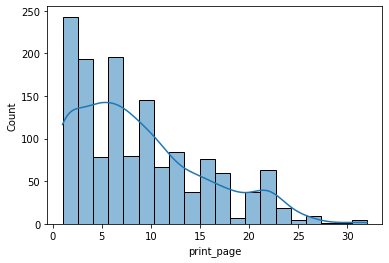

In [98]:
df['print_page'] = df['print_page'].astype(int)
sns.histplot(data=df, x='print_page', kde=True);

<AxesSubplot:xlabel='print_page'>

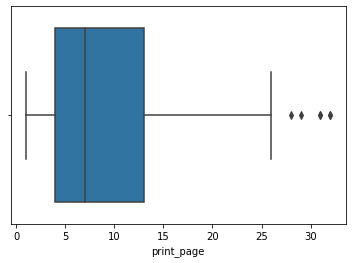

In [99]:
sns.boxplot(x=df['print_page'])

* Right skew distribution of this column of data, and 4 outliers.

<AxesSubplot:xlabel='word_count', ylabel='Count'>

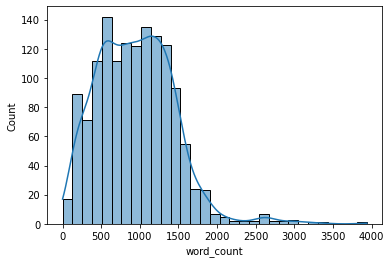

In [100]:
sns.histplot(data=df, x='word_count', kde=True)

<AxesSubplot:xlabel='word_count'>

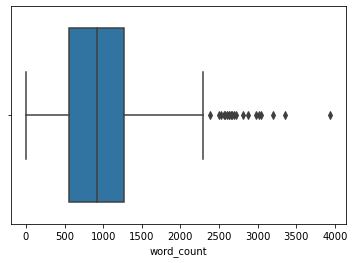

In [101]:
sns.boxplot(x=df['word_count'])

* Right skew, and so many outliers in the column of word_count.

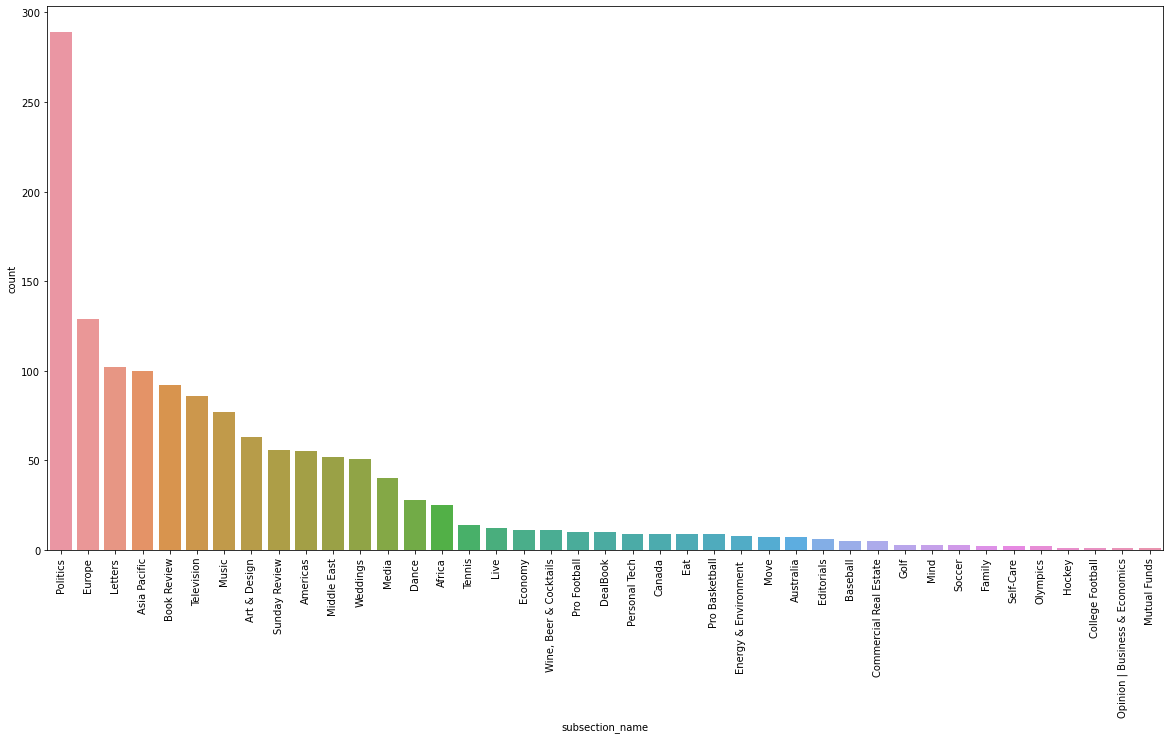

In [102]:
plt.figure(figsize = (20,10))
sns.countplot(x=df['subsection_name'],order = df['subsection_name'].value_counts().index)
plt.xticks(rotation=90);

* The subsection of politics has the most number and Europe came to the second, Mutual Funds is the least.

---